# Week 8: Text Clustering with k-means

In this notebook we will be using the pokemon dataset to try out the k-means clustering algorithm. We can then investigate the cluster to see if they look sensible.

In [55]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
#Read in csv
df = pd.read_csv("/Users/autumn/Documents/GitHub/Intro-to-ds-23-24/data/LPL 2018 Summer Playoffs - Player Stats - OraclesElixir.csv")
#See columns
df.columns

Index(['Player', 'Team', 'Pos', 'GP', 'W%', 'CTR%', 'K', 'D', 'A', 'KDA', 'KP',
       'KS%', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 'CSPM', 'CS%P15', 'DPM',
       'DMG%', 'D%P15', 'EGPM', 'GOLD%', 'STL', 'WPM', 'CWPM', 'WCPM'],
      dtype='object')

In [57]:
# Remove column from DataFrame
df = df.drop(columns=['D%P15'])
df = df.drop(columns=['STL'])


In [58]:
#Summarise
df.describe()

,GP,K,D,A,KDA,GD10,XPD10,CSD10,CSPM,DPM,EGPM,WPM,CWPM,WCPM
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,6.666667,16.270833,16.291667,38.833333,3.504167,-25.458333,-10.458333,-0.693750,6.841667,333.895833,216.770833,0.622083,0.273542,0.290208
std,4.198953,16.178183,10.692925,32.819515,1.661319,252.291115,204.480760,7.620532,3.034331,152.277216,68.417753,0.419599,0.169724,0.136124
min,1.000000,0.000000,2.000000,2.000000,0.600000,-540.000000,-460.000000,-19.000000,1.200000,124.000000,98.000000,0.200000,0.030000,0.100000
25%,3.000000,4.750000,7.000000,15.000000,2.300000,-201.000000,-107.000000,-5.550000,4.700000,200.000000,164.500000,0.387500,0.150000,0.167500
50%,4.000000,10.000000,13.000000,23.500000,3.250000,-17.000000,-16.500000,1.500000,8.300000,330.500000,226.500000,0.465000,0.200000,0.250000
75%,10.000000,27.500000,25.250000,66.000000,4.250000,134.750000,116.750000,4.925000,9.100000,426.750000,272.000000,0.522500,0.412500,0.382500
max,15.000000,61.000000,38.000000,134.000000,7.900000,550.000000,485.000000,17.000000,10.800000,644.000000,360.000000,1.770000,0.670000,0.600000


### .isna().any()

Find if there are any **NaN** values in each column. There aren't because this is a cleaned dataset!

In [59]:
df.isna().any()

Player    False
Team      False
Pos       False
GP        False
W%        False
CTR%      False
K         False
D         False
A         False
KDA       False
KP        False
KS%       False
DTH%      False
FB%       False
GD10      False
XPD10     False
CSD10     False
CSPM      False
CS%P15    False
DPM       False
DMG%      False
EGPM      False
GOLD%     False
WPM       False
CWPM      False
WCPM      False
dtype: bool

In [60]:
df

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,GOLD%,WPM,CWPM,WCPM
0,Able,Royal Never Give Up,ADC,3,33%,100%,9,9,12,2.3,...,-10.7,10.0,32.6%,514,31.6%,272,27.0%,0.20,0.03,0.54
1,Alex,FunPlus Phoenix,Jungle,3,33%,67%,4,7,16,2.9,...,-7.0,5.0,12.1%,145,11.8%,180,17.4%,0.41,0.36,0.60
2,Angel,Suning,Middle,4,50%,50%,14,8,15,3.6,...,-10.0,8.4,23.9%,394,20.7%,246,21.8%,0.80,0.52,0.23
3,Baolan,Invictus Gaming,Support,10,50%,50%,11,30,90,3.4,...,3.6,1.8,5.9%,158,7.7%,123,10.3%,1.67,0.67,0.22
4,Cat,Top Esports,Support,8,38%,100%,5,25,34,1.6,...,4.9,1.9,7.2%,142,9.6%,101,9.7%,1.36,0.40,0.38
5,Clearlove,EDward Gaming,Jungle,2,0%,0%,3,3,4,2.3,...,1.5,4.4,9.0%,155,11.7%,144,15.5%,0.52,0.44,0.43
6,Clid,JD Gaming,Jungle,15,67%,53%,27,33,84,3.4,...,0.0,4.8,12.7%,254,14.6%,186,16.7%,0.59,0.35,0.40
7,Cool,FunPlus Phoenix,Middle,3,33%,67%,7,8,15,2.8,...,-9.0,8.3,24.6%,262,20.2%,229,22.3%,0.35,0.18,0.16
8,Corn,Top Esports,Middle,8,38%,50%,30,21,20,2.4,...,5.3,9.3,26.3%,416,25.8%,265,25.8%,0.48,0.16,0.12
9,Crisp,FunPlus Phoenix,Support,3,33%,33%,4,5,17,4.2,...,1.7,1.8,5.6%,129,10.5%,105,10.4%,1.77,0.59,0.23


### Correlation Matrix

A quick way to see if any of the features are **correlated** is to use the built in ```df.corr()``` function in Pandas. 

Obviously, each feature is completely correlated with itself (row of ones down the diagonal). 

The nearer a value is to ``1``, more the two features are positively correlated. 

# Clustering 

In [62]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Standardise 

First we have to standardise the range of the dataset, as PCA and K-Means are effected by scale.

In [63]:
x = df
x = x.dropna()
x_scaled = x.drop("Player", axis = 1)
x_scaled = x_scaled.drop("Team", axis = 1)
x_scaled = x_scaled.drop("Pos", axis = 1)


In [64]:
# 列表中包含所有需要转换的列名
columns_to_convert = ['W%', 'CTR%', 'CS%P15', 'DMG%', 'GOLD%', 'KS%', 'DTH%', 'FB%', 'KP']

for column in columns_to_convert:
    # 移除字符串末尾的百分号，转换为浮点数，然后除以100.0
    x[column] = x[column].str.rstrip('%').astype(float) / 100.0
    x_scaled[column] = x_scaled[column].str.rstrip('%').astype(float) / 100.0


In [65]:
x_scaled

,GP,W%,CTR%,K,D,A,KDA,KP,KS%,DTH%,...,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,GOLD%,WPM,CWPM,WCPM
0,3,0.33,1.00,9,9,12,2.3,0.636,0.273,0.237,...,-10.7,10.0,0.326,514,0.316,272,0.270,0.20,0.03,0.54
1,3,0.33,0.67,4,7,16,2.9,0.800,0.160,0.250,...,-7.0,5.0,0.121,145,0.118,180,0.174,0.41,0.36,0.60
2,4,0.50,0.50,14,8,15,3.6,0.592,0.286,0.190,...,-10.0,8.4,0.239,394,0.207,246,0.218,0.80,0.52,0.23
3,10,0.50,0.50,11,30,90,3.4,0.711,0.077,0.200,...,3.6,1.8,0.059,158,0.077,123,0.103,1.67,0.67,0.22
4,8,0.38,1.00,5,25,34,1.6,0.549,0.070,0.229,...,4.9,1.9,0.072,142,0.096,101,0.097,1.36,0.40,0.38
5,2,0.00,0.00,3,3,4,2.3,0.583,0.250,0.125,...,1.5,4.4,0.090,155,0.117,144,0.155,0.52,0.44,0.43
6,15,0.67,0.53,27,33,84,3.4,0.657,0.160,0.231,...,0.0,4.8,0.127,254,0.146,186,0.167,0.59,0.35,0.40
7,3,0.33,0.67,7,8,15,2.8,0.880,0.280,0.286,...,-9.0,8.3,0.246,262,0.202,229,0.223,0.35,0.18,0.16
8,8,0.38,0.50,30,21,20,2.4,0.704,0.423,0.193,...,5.3,9.3,0.263,416,0.258,265,0.258,0.48,0.16,0.12
9,3,0.33,0.33,4,5,17,4.2,0.840,0.160,0.179,...,1.7,1.8,0.056,129,0.105,105,0.104,1.77,0.59,0.23


In [67]:
corr = x_scaled.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,GP,W%,CTR%,K,D,A,KDA,KP,KS%,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,GOLD%,WPM,CWPM,WCPM
GP,1.000000,0.558310,-0.021707,0.727997,0.857084,0.890593,0.251223,0.133805,0.042641,-0.089078,-0.188197,0.163581,0.082882,0.147614,-0.035959,-0.021406,0.221560,0.052127,0.132298,-0.018855,0.133723,0.083793,-0.077302
W%,0.558310,1.000000,0.279093,0.566697,0.372152,0.632773,0.698659,0.237501,0.118091,0.258549,-0.069664,0.323517,0.210238,0.194314,0.048740,0.026078,0.208308,-0.009879,0.300677,0.046668,0.062579,0.057664,-0.075160
CTR%,-0.021707,0.279093,1.000000,-0.006696,0.003141,-0.004238,0.075971,0.093961,-0.003122,0.420375,0.052941,0.102161,0.178651,0.063432,0.061204,0.056715,0.105826,0.024231,0.088915,0.015599,-0.082522,-0.128164,0.116637
K,0.727997,0.566697,-0.006696,1.000000,0.522494,0.592430,0.506043,0.166672,0.511315,-0.217392,-0.104068,0.253545,0.128253,0.212102,0.397385,0.397876,0.634224,0.436976,0.610632,0.443604,-0.255497,-0.243511,0.055720
D,0.857084,0.372152,0.003141,0.522494,1.000000,0.811648,-0.102474,0.051232,-0.088489,0.138615,-0.136589,0.076332,0.071974,0.131288,-0.200454,-0.183075,0.111349,-0.085792,-0.050860,-0.184172,0.222978,0.153819,-0.142416
A,0.890593,0.632773,-0.004238,0.592430,0.811648,1.000000,0.328272,0.192270,-0.148769,0.005191,-0.111533,0.216041,0.100732,0.138433,-0.253854,-0.241609,0.063890,-0.155496,-0.046627,-0.234809,0.302186,0.299074,-0.082479
KDA,0.251223,0.698659,0.075971,0.506043,-0.102474,0.328272,1.000000,0.418362,0.375108,-0.196402,-0.051318,0.375889,0.208871,0.245550,0.248185,0.254977,0.318434,0.240734,0.456413,0.297265,-0.086054,-0.054081,0.168876
KP,0.133805,0.237501,0.093961,0.166672,0.051232,0.192270,0.418362,1.000000,0.315310,0.030880,0.255362,0.261823,0.282635,0.243594,-0.164886,-0.174272,-0.067701,-0.070062,-0.011958,-0.063375,0.144710,0.283633,0.279377
KS%,0.042641,0.118091,-0.003122,0.511315,-0.088489,-0.148769,0.375108,0.315310,1.000000,-0.229629,0.078144,0.262175,0.215567,0.289343,0.629662,0.622228,0.639359,0.662688,0.729334,0.739119,-0.481035,-0.442866,0.249253
DTH%,-0.089078,0.258549,0.420375,-0.217392,0.138615,0.005191,-0.196402,0.030880,-0.229629,1.000000,-0.033009,0.016244,0.151221,0.017908,-0.312725,-0.325335,-0.298458,-0.358843,-0.267243,-0.347397,0.250112,0.198650,-0.130487


In [68]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

### Plot in 2D

Now we can use PCA to reduce the dataset to only 2 dimensions. This means we can plot it on a 2D axis.

In [69]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)

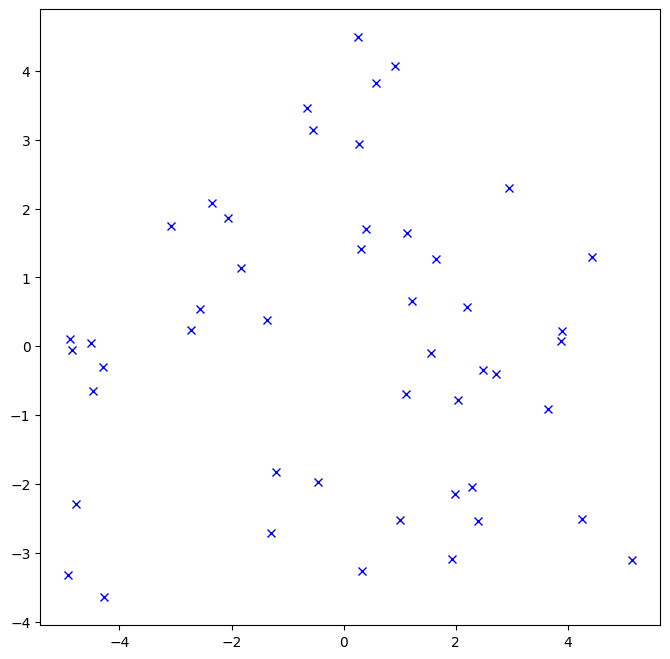

In [70]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [71]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

### Elbow Plot

Whats the best value of **k**? We can look for the **elbow** that shows a big jump in **inertia** before a flattening off. Here we plot the first 20 values of k.

Remember, this is just a guide to help you pick a value of k and other factors may be involved in your final decision 

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

([<matplotlib.axis.XTick at 0x162c5be80>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20')])

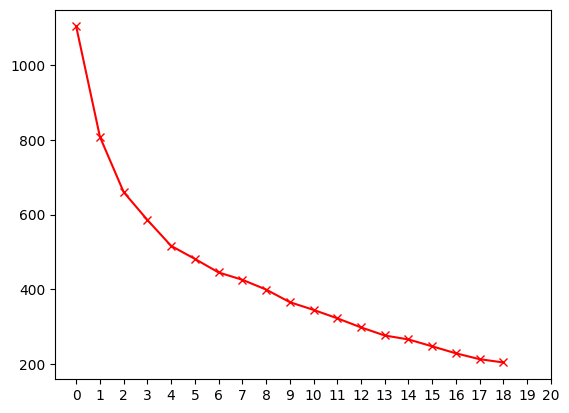

In [72]:
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x_scaled)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")
plt.xticks(np.arange(0, 21, 1.0))

# Cluster and Plot

First try with all the features. 

You may find that your clusters and their centres don't look right. Remember, we are clustering based on **all** of the features, and then reducing down to 2 dimensions to plot. 

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


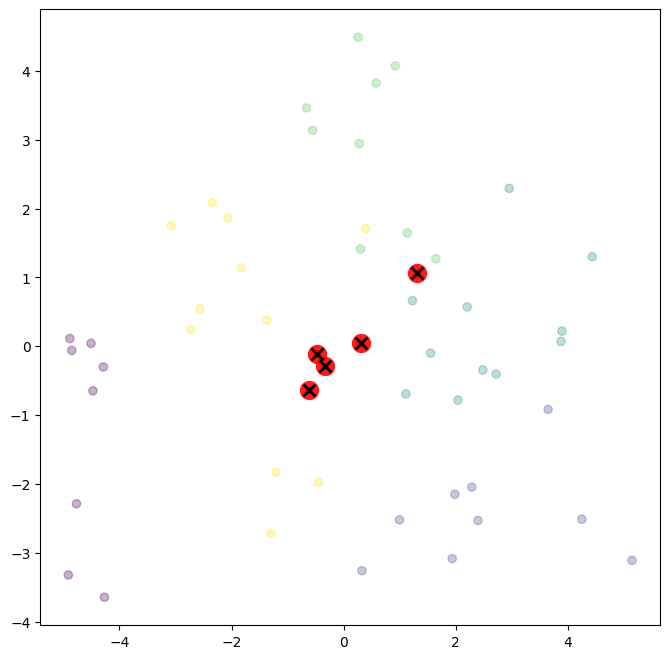

In [73]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaled)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x_scaled)

### Reducing Dimensions before clustering

You can also try reducing the dimensions before clustering, which may give you better results.

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


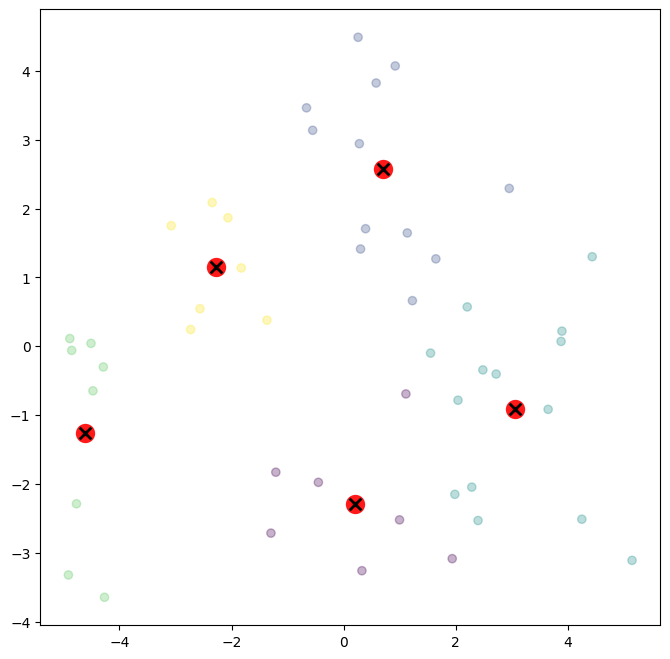

In [74]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

## Examine Clusters

Here we plot a selection of features for each cluster. Can we use this to help us characterise each cluster?

/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_84227/2508074591.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')


Text(0.5, 0, 'cluster number')

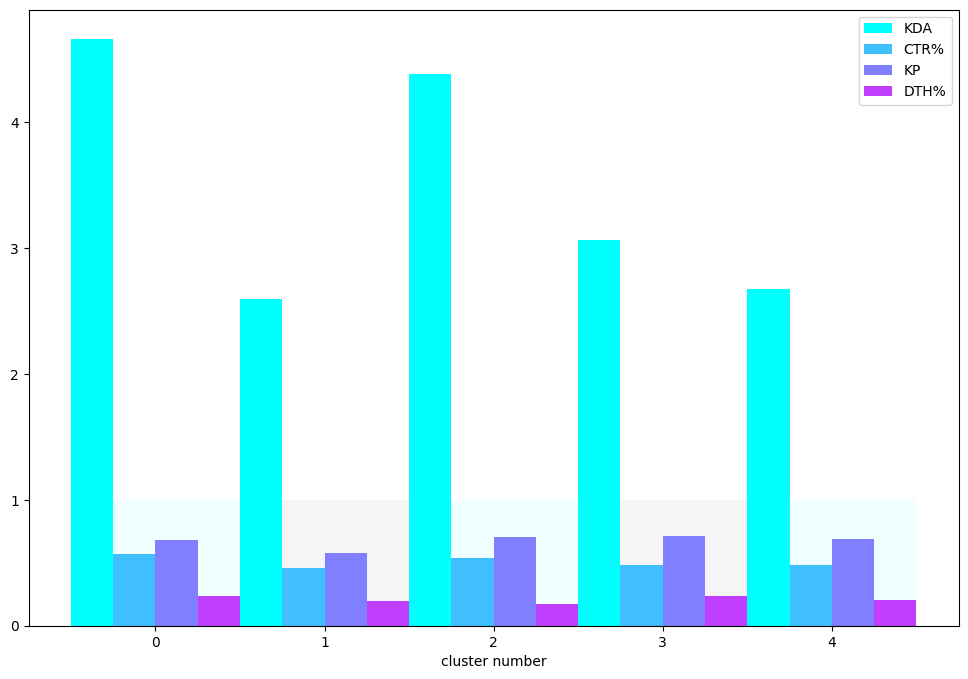

In [75]:
#Add cluster labels as extra column in dataframe
labels = kmeans.predict(x_less_dimensions)
x["cluster"] = labels

#Pick some features to plot
features = ['KDA', 'CTR%', 'KP', 'DTH%']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(x[x["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")

Lets look at some of the Pokemon in each cluster, to see if the clusters look sensible.

In [76]:
pd.DataFrame(x[x['cluster'] == 0])

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,EGPM,GOLD%,WPM,CWPM,WCPM,cluster
6,Clid,JD Gaming,Jungle,15,0.67,0.53,27,33,84,3.4,...,4.8,0.127,254,0.146,186,0.167,0.59,0.35,0.40,0
15,H4cker,Suning,Jungle,4,0.50,0.50,10,7,28,5.4,...,5.6,0.139,289,0.155,211,0.191,0.46,0.41,0.46,0
20,Karsa,Royal Never Give Up,Jungle,9,0.78,0.33,39,22,88,5.8,...,5.2,0.128,421,0.200,236,0.195,0.49,0.38,0.35,0
24,Letme,Royal Never Give Up,Top,12,0.67,0.42,32,28,82,4.1,...,8.0,0.224,373,0.184,242,0.205,0.46,0.16,0.17,0
34,Ning,Invictus Gaming,Jungle,10,0.50,0.60,24,38,73,2.6,...,5.1,0.132,307,0.146,202,0.171,0.40,0.37,0.35,0
46,Zoom,JD Gaming,Top,15,0.67,0.60,35,30,79,3.8,...,9.3,0.268,385,0.225,274,0.239,0.49,0.19,0.16,0
47,Zz1tai,Royal Never Give Up,Top,1,1.00,1.00,5,2,10,7.5,...,8.6,0.238,297,0.168,284,0.227,0.51,0.14,0.16,0


In [77]:
pd.DataFrame(x[x['cluster'] == 1])

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,EGPM,GOLD%,WPM,CWPM,WCPM,cluster
0,Able,Royal Never Give Up,ADC,3,0.33,1.00,9,9,12,2.3,...,10.0,0.326,514,0.316,272,0.270,0.20,0.03,0.54,1
2,Angel,Suning,Middle,4,0.50,0.50,14,8,15,3.6,...,8.4,0.239,394,0.207,246,0.218,0.80,0.52,0.23,1
7,Cool,FunPlus Phoenix,Middle,3,0.33,0.67,7,8,15,2.8,...,8.3,0.246,262,0.202,229,0.223,0.35,0.18,0.16,1
11,Duke,Invictus Gaming,Top,3,0.33,0.33,6,4,10,4.0,...,8.0,0.263,235,0.156,220,0.218,0.36,0.04,0.19,1
14,GimGoon,FunPlus Phoenix,Top,3,0.33,0.33,0,5,13,2.6,...,8.0,0.230,233,0.194,205,0.205,0.49,0.18,0.22,1
17,Holder,Rogue Warriors,Top,3,0.00,0.67,3,12,5,0.7,...,8.3,0.284,370,0.238,204,0.218,0.40,0.11,0.14,1
25,Lies,Top Esports,Top,2,0.00,0.00,1,5,2,0.6,...,9.1,0.260,403,0.264,225,0.238,0.47,0.11,0.15,1
32,Mouse,Rogue Warriors,Top,4,0.25,0.75,4,15,22,1.7,...,7.9,0.241,267,0.159,202,0.203,0.47,0.15,0.18,1
33,Moyu,Top Esports,Top,6,0.50,0.33,14,11,28,3.8,...,8.9,0.270,350,0.207,271,0.253,0.38,0.15,0.11,1
35,QiuQiu,Top Esports,ADC,8,0.38,0.13,12,28,24,1.3,...,9.0,0.269,444,0.291,243,0.228,0.44,0.17,0.21,1


In [78]:
pd.DataFrame(x[x['cluster'] == 2])

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,EGPM,GOLD%,WPM,CWPM,WCPM,cluster
8,Corn,Top Esports,Middle,8,0.38,0.50,30,21,20,2.4,...,9.3,0.263,416,0.258,265,0.258,0.48,0.16,0.12,2
10,Doinb,Rogue Warriors,Middle,7,0.14,0.43,16,20,30,2.3,...,9.1,0.267,332,0.211,241,0.246,0.39,0.11,0.35,2
13,Fury,Suning,ADC,4,0.50,1.00,12,7,23,5.0,...,10.0,0.288,535,0.283,279,0.253,0.43,0.25,0.50,2
18,iBoy,EDward Gaming,ADC,4,0.25,0.25,15,5,11,5.2,...,10.4,0.333,405,0.285,305,0.305,0.36,0.15,0.56,2
19,JackeyLove,Invictus Gaming,ADC,10,0.50,0.40,41,27,51,3.4,...,10.1,0.323,597,0.292,314,0.266,0.32,0.14,0.47,2
23,Langx,Suning,Top,4,0.50,1.00,8,10,21,2.9,...,9.7,0.275,547,0.286,265,0.235,0.35,0.06,0.10,2
26,LokeN,JD Gaming,ADC,15,0.67,0.73,59,17,65,7.3,...,9.8,0.303,537,0.312,307,0.268,0.40,0.17,0.38,2
28,Lwx,FunPlus Phoenix,ADC,3,0.33,0.33,10,3,9,6.3,...,10.6,0.347,486,0.382,297,0.294,0.28,0.07,0.31,2
37,Rookie,Invictus Gaming,Middle,10,0.50,0.70,29,25,76,4.2,...,8.7,0.248,580,0.283,272,0.230,0.51,0.19,0.16,2
39,Smlz,Rogue Warriors,ADC,7,0.14,0.29,29,25,20,2.0,...,9.7,0.305,610,0.353,290,0.290,0.32,0.10,0.39,2


In [79]:
pd.DataFrame(x[x['cluster'] == 3])

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,EGPM,GOLD%,WPM,CWPM,WCPM,cluster
3,Baolan,Invictus Gaming,Support,10,0.50,0.50,11,30,90,3.4,...,1.8,0.059,158,0.077,123,0.103,1.67,0.67,0.22,3
4,Cat,Top Esports,Support,8,0.38,1.00,5,25,34,1.6,...,1.9,0.072,142,0.096,101,0.097,1.36,0.40,0.38,3
9,Crisp,FunPlus Phoenix,Support,3,0.33,0.33,4,5,17,4.2,...,1.8,0.056,129,0.105,105,0.104,1.77,0.59,0.23,3
21,Killua,Rogue Warriors,Support,7,0.14,0.43,3,29,44,1.6,...,1.4,0.056,154,0.097,98,0.100,1.44,0.45,0.23,3
27,LvMao,JD Gaming,Support,15,0.67,0.33,6,38,114,3.2,...,1.5,0.046,131,0.077,106,0.093,1.40,0.52,0.22,3
29,Meiko,EDward Gaming,Support,4,0.25,0.75,3,12,21,2.0,...,1.7,0.058,124,0.088,99,0.097,1.46,0.48,0.31,3
30,Ming,Royal Never Give Up,Support,13,0.69,0.54,18,31,134,4.9,...,1.2,0.036,216,0.109,119,0.098,1.57,0.58,0.28,3
45,Yoon,Suning,Support,4,0.50,0.00,5,10,31,3.6,...,2.0,0.058,131,0.068,122,0.103,1.43,0.55,0.19,3


In [80]:
pd.DataFrame(x[x['cluster'] == 4])

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,EGPM,GOLD%,WPM,CWPM,WCPM,cluster
1,Alex,FunPlus Phoenix,Jungle,3,0.33,0.67,4,7,16,2.9,...,5.0,0.121,145,0.118,180,0.174,0.41,0.36,0.60,4
5,Clearlove,EDward Gaming,Jungle,2,0.00,0.00,3,3,4,2.3,...,4.4,0.090,155,0.117,144,0.155,0.52,0.44,0.43,4
12,Flawless,Rogue Warriors,Jungle,4,0.25,0.50,10,14,22,2.3,...,4.9,0.126,296,0.172,169,0.167,0.53,0.42,0.35,4
16,Haro,EDward Gaming,Jungle,2,0.50,0.50,4,4,8,3.0,...,4.3,0.109,134,0.091,160,0.152,0.82,0.46,0.43,4
22,Kiwi,Rogue Warriors,Jungle,3,0.00,0.33,1,7,14,2.1,...,3.8,0.095,159,0.109,129,0.138,0.49,0.45,0.37,4
31,Mlxg,Royal Never Give Up,Jungle,4,0.50,1.00,6,12,32,3.2,...,3.9,0.090,161,0.084,157,0.137,0.34,0.32,0.32,4
43,Xx,Top Esports,Jungle,8,0.38,0.38,9,19,46,2.9,...,4.8,0.128,213,0.134,166,0.169,0.38,0.32,0.42,4
